In [2]:
# Carregando Pacotes
library(readr)
library(dplyr)
library(ggplot2)
library(scales)
library(data.table)

In [4]:
# Usando read.csv2()
system.time(df_teste1 <- read.csv2("TemperaturasGlobais/TemperaturasGlobais.csv"))

   user  system elapsed 
 259.39    1.34  261.65 

In [5]:
# Usando read.table()
system.time(df_teste2 <- read.table("TemperaturasGlobais/TemperaturasGlobais.csv"))

   user  system elapsed 
 222.19    0.77  223.08 

In [6]:
# Usando fread()
?fread
system.time(df <- fread("TemperaturasGlobais/TemperaturasGlobais.csv"))

   user  system elapsed 
   6.97    0.37    8.58 

fread {data.table},R Documentation
input,"Either the file name to read (containing no \n character), a shell command that pre-processes the file (e.g. fread(""grep blah filename"")) or the input itself as a string (containing at least one \n), see examples. In both cases, a length 1 character string. A filename input is passed through path.expand for convenience. input can also be a URL starting with http:// or file://; see Details."
sep,"The separator between columns. Defaults to the character in the set [,\t |;:] that separates the sample of rows into the most number of lines with the same number of fields. Use NULL or """" to specify no separator; i.e. each line a single character column like base::readLines does."
sep2,"The separator within columns. A list column will be returned where each cell is a vector of values. This is much faster using less working memory than strsplit afterwards or similar techniques. For each column sep2 can be different and is the first character in the same set above [,\t |;], other than sep, that exists inside each field outside quoted regions in the sample. NB: sep2 is not yet implemented."
nrows,"The maximum number of rows to read. Unlike read.table, you do not need to set this to an estimate of the number of rows in the file for better speed because that is already automatically determined by fread almost instantly using the large sample of lines. 'nrows=0' returns the column names and typed empty columns determined by the large sample; useful for a dry run of a large file or to quickly check format consistency of a set of files before starting to read any of them."
header,"Does the first data line contain column names? Defaults according to whether every non-empty field on the first data line is type character. If so, or TRUE is supplied, any empty column names are given a default name."
na.strings,"A character vector of strings which are to be interpreted as NA values. By default, "",,"" for columns of all types, including type 'character' is read as NA for consistency. ,"""", is unambiguous and read as an empty string. To read ,NA, as NA, set na.strings=""NA"". To read ,, as blank string """", set na.strings=NULL. When they occur in the file, the strings in na.strings should not appear quoted since that is how the string literal ,""NA"", is distinguished from ,NA,, for example, when na.strings=""NA""."
file,"File path, useful when we want to ensure that no shell commands will be executed. File path can also be provided to input argument."
stringsAsFactors,Convert all character columns to factors?
verbose,Be chatty and report timings?
skip,"If 0 (default) start on the first line and from there finds the first row with a consistent number of columns. This automatically avoids irregular header information before the column names row. skip>0 means ignore the first skip rows manually. skip=""string"" searches for ""string"" in the file (e.g. a substring of the column names row) and starts on that line (inspired by read.xls in package gdata)."


In [7]:
# Criando subsets dos dados carregados
cidadesBrasil <- subset(df, Country == 'Brazil')
cidadesBrasil <- na.omit(cidadesBrasil)
head(cidadesBrasil)
nrow(df)
nrow(cidadesBrasil)
dim(cidadesBrasil)

dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W
1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W
1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W
1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W
1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W
1832-06-01,23.844,1.695,Alagoinhas,Brazil,12.05S,37.81W


[1] 8599212

[1] 451645

[1] 451645      7

In [8]:
# Convertendo as Datas
cidadesBrasil$dt <- as.POSIXct(cidadesBrasil$dt,format='%Y-%m-%d')
cidadesBrasil$Month <- month(cidadesBrasil$dt)
cidadesBrasil$Year <- year(cidadesBrasil$dt)

In [9]:
# Palmas
plm <- subset(cidadesBrasil, City == 'Palmas')
plm <- subset(plm, Year %in% c(1796,1846,1896,1946,1996,2012))

In [10]:
# Curitiba
crt <- subset(cidadesBrasil, City == 'Curitiba')
crt <- subset(crt, Year %in% c(1796,1846,1896,1946,1996,2012))

In [11]:
# Recife
recf <- subset(cidadesBrasil, City=='Recife')
recf <- subset(recf,Year %in% c(1796,1846,1896,1946,1996,2012))

In [12]:
# Construindo os Plots
p_plm <- ggplot(plm, aes(x = (Month), y = AverageTemperature, color = as.factor(Year))) +
  geom_smooth(se = FALSE,fill = NA, size = 2) +
  theme_light(base_size = 20) +
  xlab("Mês")+
  ylab("Temperatura Média") +
  scale_color_discrete("") +
  ggtitle("Temperatura Média ao longo dos anos em Palmas") +
  theme(plot.title = element_text(size = 18))

p_crt <- ggplot(crt, aes(x = (Month), y = AverageTemperature, color = as.factor(Year))) +
  geom_smooth(se = FALSE,fill = NA, size = 2) +
  theme_light(base_size = 20) +
  xlab("Mês")+
  ylab("Temperatura") +
  scale_color_discrete("") +
  ggtitle("Temperatura Média ao longo dos anos em Curitiba") +
  theme(plot.title = element_text(size = 18))

p_recf <- ggplot(recf, aes(x = (Month), y = AverageTemperature, color = as.factor(Year))) +
  geom_smooth(se = FALSE,fill = NA, size = 2) +
  theme_light(base_size = 20) +
  xlab("Mês")+
  ylab("Temperatura Média") +
  scale_color_discrete("") +
  ggtitle("Temperatura Média ao longo dos anos em Recife") +
  theme(plot.title = element_text(size = 18))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


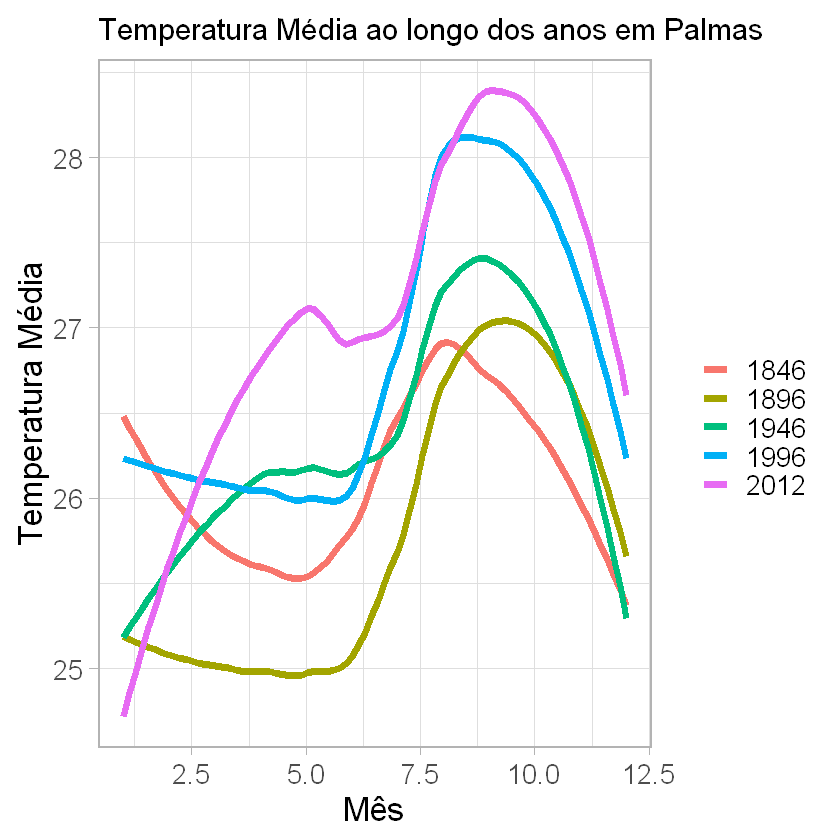

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


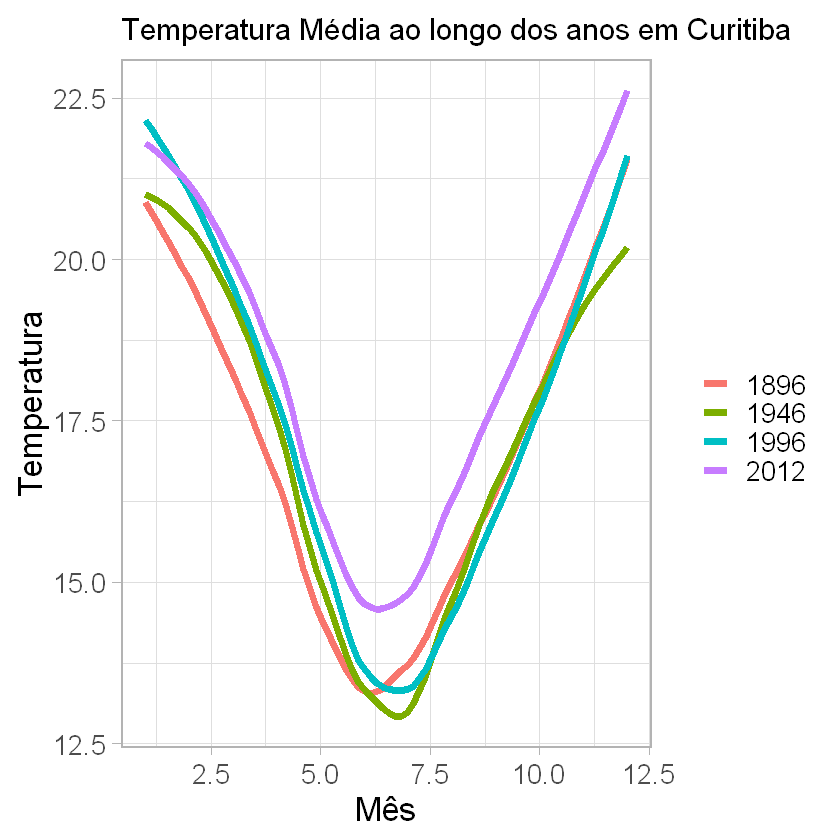

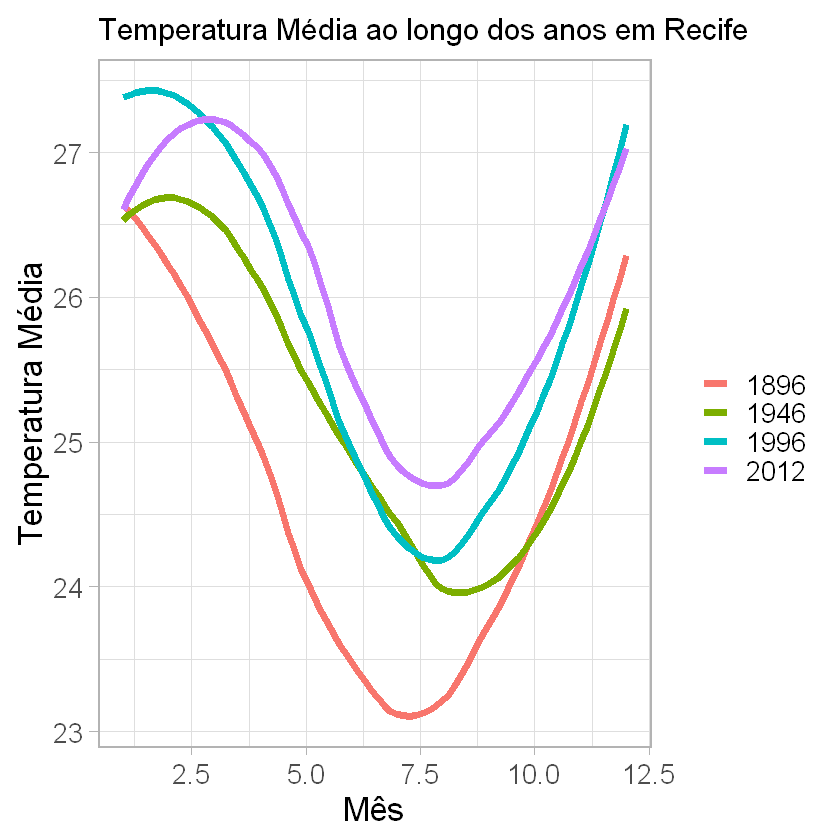

In [13]:
# Plotando
p_plm
p_crt
p_recf